In [3]:
ee.Initialize(project='radiant-math-461513-c0')


In [11]:
!pip install geemap geopandas requests pandas matplotlib seaborn

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
import datetime as dt
import geemap
import ee


In [12]:
# Inisialisasi Earth Engine
import ee
ee.Authenticate()  # Akan membuka tautan autentikasi
ee.Initialize(project='radiant-math-461513-c0')



In [14]:
mobility_url = "https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv"
mobility_df = pd.read_csv(mobility_url, parse_dates=["date"])
mobility_df.head()


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [15]:
# Unduh data mobilitas Google
mobility_url = "https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv"
mobility_df = pd.read_csv(mobility_url, parse_dates=["date"])

# Filter hanya untuk Indonesia (tingkat nasional)
indo_mobility = mobility_df[
    (mobility_df['country_region'] == 'Indonesia') &
    (mobility_df['sub_region_1'].isna())  # Hanya level nasional
]

# Hanya kolom penting
indo_mobility = indo_mobility[[
    'date',
    'retail_and_recreation_percent_change_from_baseline',
    'grocery_and_pharmacy_percent_change_from_baseline',
    'parks_percent_change_from_baseline',
    'transit_stations_percent_change_from_baseline',
    'workplaces_percent_change_from_baseline',
    'residential_percent_change_from_baseline'
]]

indo_mobility.head()


,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
4948786,2020-02-15,-2.0,-2.0,-8.0,1.0,5.0,1.0
4948787,2020-02-16,-3.0,-3.0,-7.0,-4.0,2.0,2.0
4948788,2020-02-17,-3.0,-4.0,-7.0,-1.0,3.0,1.0
4948789,2020-02-18,-3.0,-2.0,-4.0,1.0,2.0,1.0
4948790,2020-02-19,-3.0,-4.0,-3.0,0.0,1.0,1.0


In [16]:
owid_url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
owid_df = pd.read_csv(owid_url, parse_dates=["date"])

# Filter hanya untuk Indonesia
indo_covid = owid_df[owid_df['location'] == 'Indonesia']

# Pilih kolom utama
indo_covid = indo_covid[[
    'date',
    'new_cases',
    'new_deaths',
    'people_fully_vaccinated',
    'stringency_index'
]]

indo_covid.head()


,date,new_cases,new_deaths,people_fully_vaccinated,stringency_index
175231,2020-01-05,0.0,0.0,NaN,5.56
175232,2020-01-06,0.0,0.0,NaN,5.56
175233,2020-01-07,0.0,0.0,NaN,5.56
175234,2020-01-08,0.0,0.0,NaN,5.56
175235,2020-01-09,0.0,0.0,NaN,5.56


In [17]:
indo_merged = pd.merge(indo_mobility, indo_covid, on='date', how='inner')
indo_merged.head()


,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,new_cases,new_deaths,people_fully_vaccinated,stringency_index
0,2020-02-15,-2.0,-2.0,-8.0,1.0,5.0,1.0,0.0,0.0,NaN,28.7
1,2020-02-16,-3.0,-3.0,-7.0,-4.0,2.0,2.0,0.0,0.0,NaN,28.7
2,2020-02-17,-3.0,-4.0,-7.0,-1.0,3.0,1.0,0.0,0.0,NaN,28.7
3,2020-02-18,-3.0,-2.0,-4.0,1.0,2.0,1.0,0.0,0.0,NaN,28.7
4,2020-02-19,-3.0,-4.0,-3.0,0.0,1.0,1.0,0.0,0.0,NaN,28.7


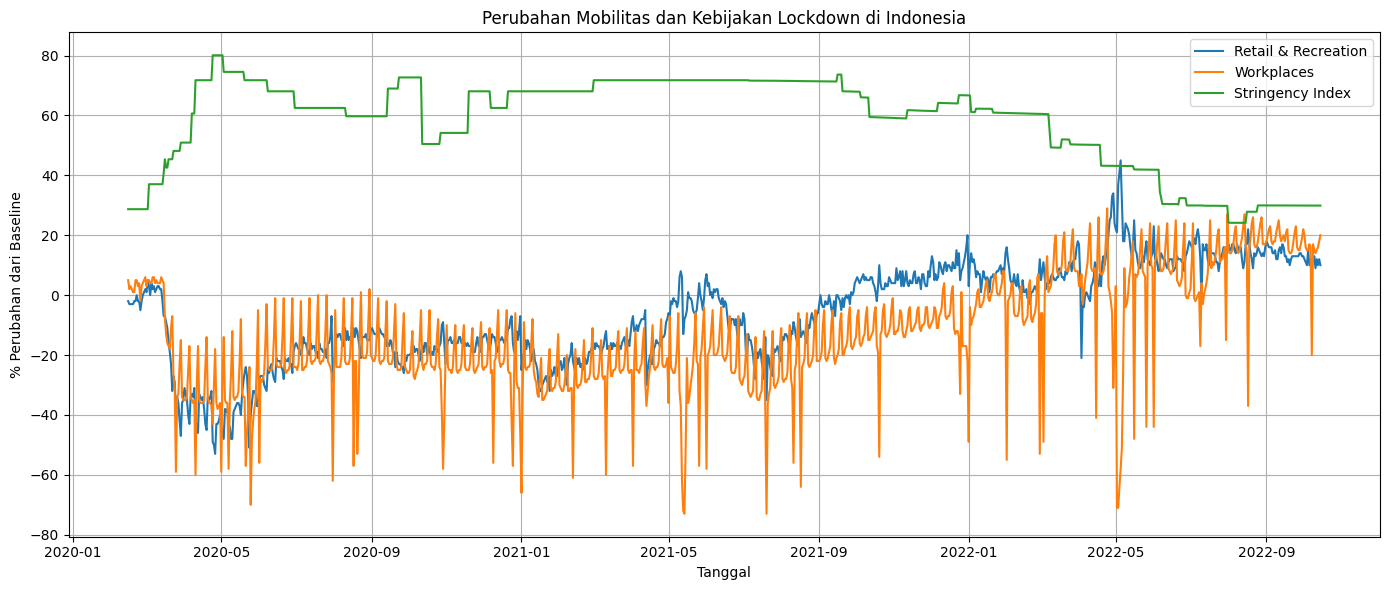

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.lineplot(data=indo_merged, x='date', y='retail_and_recreation_percent_change_from_baseline', label='Retail & Recreation')
sns.lineplot(data=indo_merged, x='date', y='workplaces_percent_change_from_baseline', label='Workplaces')
sns.lineplot(data=indo_merged, x='date', y='stringency_index', label='Stringency Index')
plt.title('Perubahan Mobilitas dan Kebijakan Lockdown di Indonesia')
plt.xlabel('Tanggal')
plt.ylabel('% Perubahan dari Baseline')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [19]:
import ee
ee.Authenticate()  # Akan membuka link ke akun Google Earth Engine
ee.Initialize(project='radiant-math-461513-c0')


In [21]:
import pandas as pd

# Fungsi untuk ambil data bulanan VIIRS NTL di Indonesia
def get_viirs_ntl_timeseries(start_date='2020-01-01', end_date='2021-12-31'):
    # Polygon Indonesia
    indonesia = ee.FeatureCollection("USDOS/LSIB_SIMPLE/2017") \
                  .filter(ee.Filter.eq('country_na', 'Indonesia')) \
                  .geometry()

    # Koleksi VIIRS NTL
    viirs = ee.ImageCollection('NOAA/VIIRS/DNB/MONTHLY_V1/VCMCFG') \
              .filterDate(start_date, end_date) \
              .filterBounds(indonesia) \
              .select('avg_rad')

    # Fungsi untuk ekstrak mean cahaya per bulan
    def extract(image):
        stats = image.reduceRegion(
            reducer=ee.Reducer.mean(),
            geometry=indonesia,
            scale=500,
            maxPixels=1e9
        )
        return ee.Feature(None, {
            'date': image.date().format('YYYY-MM-dd'),
            'mean_rad': stats.get('avg_rad')
        })

    # Terapkan fungsi & ambil hasil
    features = viirs.map(extract).getInfo()['features']
    data = [{'date': f['properties']['date'], 'mean_rad': f['properties']['mean_rad']} for f in features]

    df = pd.DataFrame(data)
    df['date'] = pd.to_datetime(df['date'])
    df = df.sort_values('date')
    return df


In [22]:
ntl_df = get_viirs_ntl_timeseries(start_date='2020-01-01', end_date='2021-12-31')
ntl_df.head()


,date,mean_rad
0,2020-01-01,0.264315
1,2020-02-01,0.500737
2,2020-03-01,0.536824
3,2020-04-01,0.591342
4,2020-05-01,0.456346


In [23]:
# Gabung dengan df yang sebelumnya (indo_merged)
final_df = pd.merge(indo_merged, ntl_df, on='date', how='left')
final_df.head()


,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,new_cases,new_deaths,people_fully_vaccinated,stringency_index,mean_rad
0,2020-02-15,-2.0,-2.0,-8.0,1.0,5.0,1.0,0.0,0.0,NaN,28.7,NaN
1,2020-02-16,-3.0,-3.0,-7.0,-4.0,2.0,2.0,0.0,0.0,NaN,28.7,NaN
2,2020-02-17,-3.0,-4.0,-7.0,-1.0,3.0,1.0,0.0,0.0,NaN,28.7,NaN
3,2020-02-18,-3.0,-2.0,-4.0,1.0,2.0,1.0,0.0,0.0,NaN,28.7,NaN
4,2020-02-19,-3.0,-4.0,-3.0,0.0,1.0,1.0,0.0,0.0,NaN,28.7,NaN


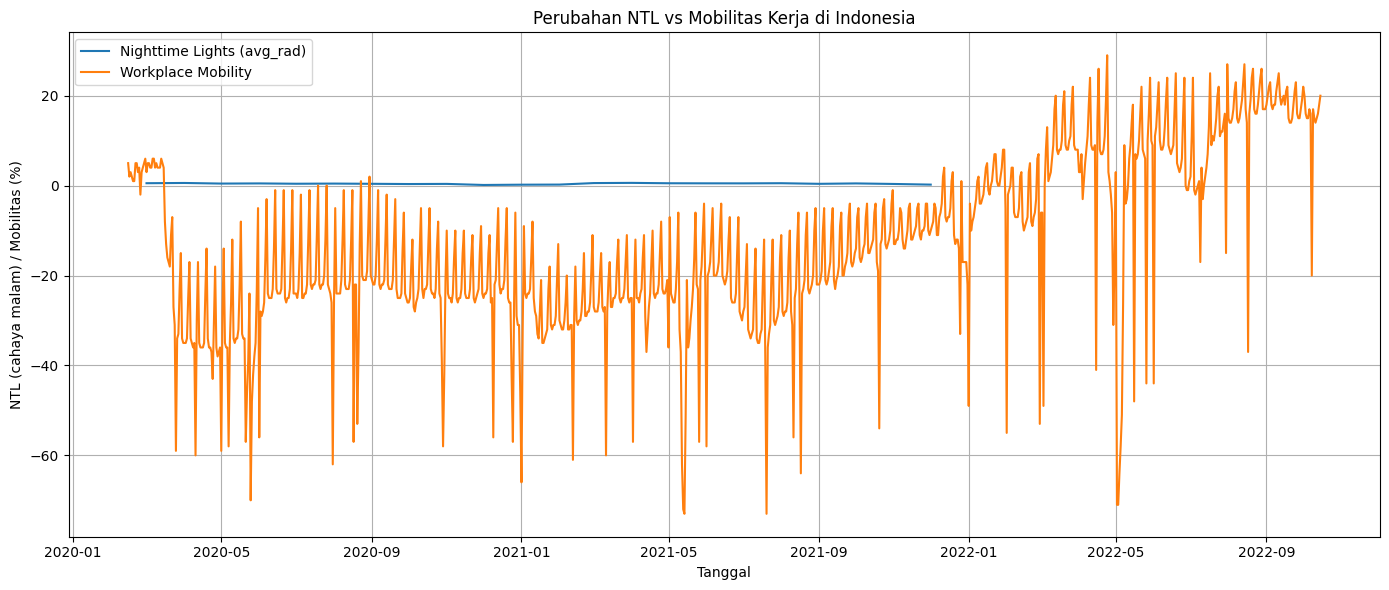

In [24]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=final_df, x='date', y='mean_rad', label='Nighttime Lights (avg_rad)')
sns.lineplot(data=final_df, x='date', y='workplaces_percent_change_from_baseline', label='Workplace Mobility')
plt.title('Perubahan NTL vs Mobilitas Kerja di Indonesia')
plt.xlabel('Tanggal')
plt.ylabel('NTL (cahaya malam) / Mobilitas (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [25]:
# Korelasi antara mean_rad dan indikator mobilitas
corr_workplace = final_df[['mean_rad', 'workplaces_percent_change_from_baseline']].corr().iloc[0,1]
corr_retail = final_df[['mean_rad', 'retail_and_recreation_percent_change_from_baseline']].corr().iloc[0,1]

print(f"Korelasi NTL vs Workplaces: {corr_workplace:.3f}")
print(f"Korelasi NTL vs Retail & Recreation: {corr_retail:.3f}")


Korelasi NTL vs Workplaces: 0.039
Korelasi NTL vs Retail & Recreation: -0.013


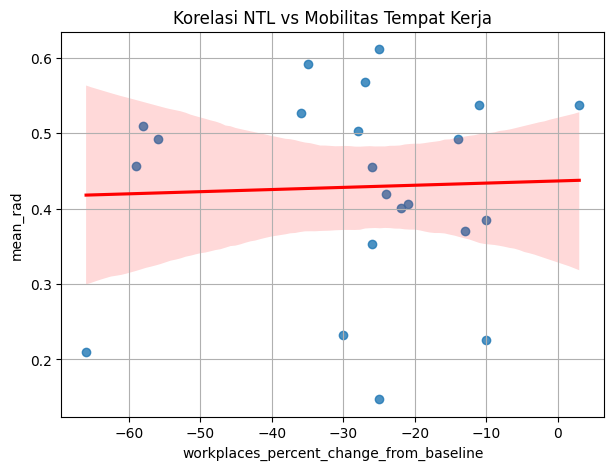

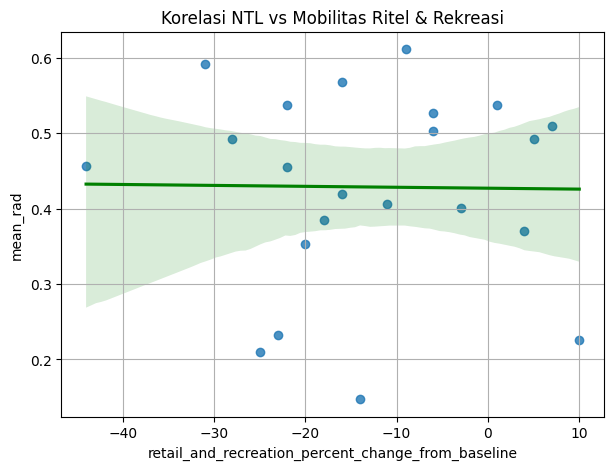

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter NTL vs workplaces
plt.figure(figsize=(7, 5))
sns.regplot(data=final_df, x='workplaces_percent_change_from_baseline', y='mean_rad', line_kws={"color": "red"})
plt.title("Korelasi NTL vs Mobilitas Tempat Kerja")
plt.grid(True)
plt.show()

# Scatter NTL vs retail
plt.figure(figsize=(7, 5))
sns.regplot(data=final_df, x='retail_and_recreation_percent_change_from_baseline', y='mean_rad', line_kws={"color": "green"})
plt.title("Korelasi NTL vs Mobilitas Ritel & Rekreasi")
plt.grid(True)
plt.show()


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Fitur dan target
features = final_df[[
    'stringency_index',
    'workplaces_percent_change_from_baseline',
    'retail_and_recreation_percent_change_from_baseline'
]]
target = final_df['mean_rad']

# Hilangkan NaN
X = features.dropna()
y = target.loc[X.index]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
# Gabungkan fitur dan target jadi satu DataFrame dulu
ml_df = final_df[[
    'stringency_index',
    'workplaces_percent_change_from_baseline',
    'retail_and_recreation_percent_change_from_baseline',
    'mean_rad'
]].dropna()  # Hapus semua baris dengan NaN

# Pisahkan kembali
X = ml_df[[
    'stringency_index',
    'workplaces_percent_change_from_baseline',
    'retail_and_recreation_percent_change_from_baseline'
]]
y = ml_df['mean_rad']

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# Koefisien
coeff_df = pd.DataFrame({
    'Fitur': X.columns,
    'Koefisien': model.coef_
})
print(coeff_df)


R² Score: -12.740654311538165
MSE: 0.08719291073558108
                                               Fitur  Koefisien
0                                   stringency_index   0.010552
1            workplaces_percent_change_from_baseline   0.002545
2  retail_and_recreation_percent_change_from_base...  -0.000534


In [31]:
import joblib

# Simpan model ke file
joblib.dump(model, 'model_linear_regression_ntl.pkl')
print("Model linear regression disimpan sebagai 'model_linear_regression_ntl.pkl'")


Model linear regression disimpan sebagai 'model_linear_regression_ntl.pkl'


In [32]:
from sklearn.ensemble import RandomForestRegressor

# Inisialisasi model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit model
rf_model.fit(X_train, y_train)

# Prediksi
rf_pred = rf_model.predict(X_test)

# Evaluasi
rf_r2 = r2_score(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

print("Random Forest R² Score:", rf_r2)
print("Random Forest MSE:", rf_mse)


Random Forest R² Score: -2.8697143995586236
Random Forest MSE: 0.02455572016898641


In [33]:
# Bandingkan hasil kedua model
print("=== Perbandingan Model ===")
print(f"Linear Regression - R²: {r2_score(y_test, y_pred):.4f}, MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Random Forest      - R²: {rf_r2:.4f}, MSE: {rf_mse:.2f}")


=== Perbandingan Model ===
Linear Regression - R²: -12.7407, MSE: 0.09
Random Forest      - R²: -2.8697, MSE: 0.02


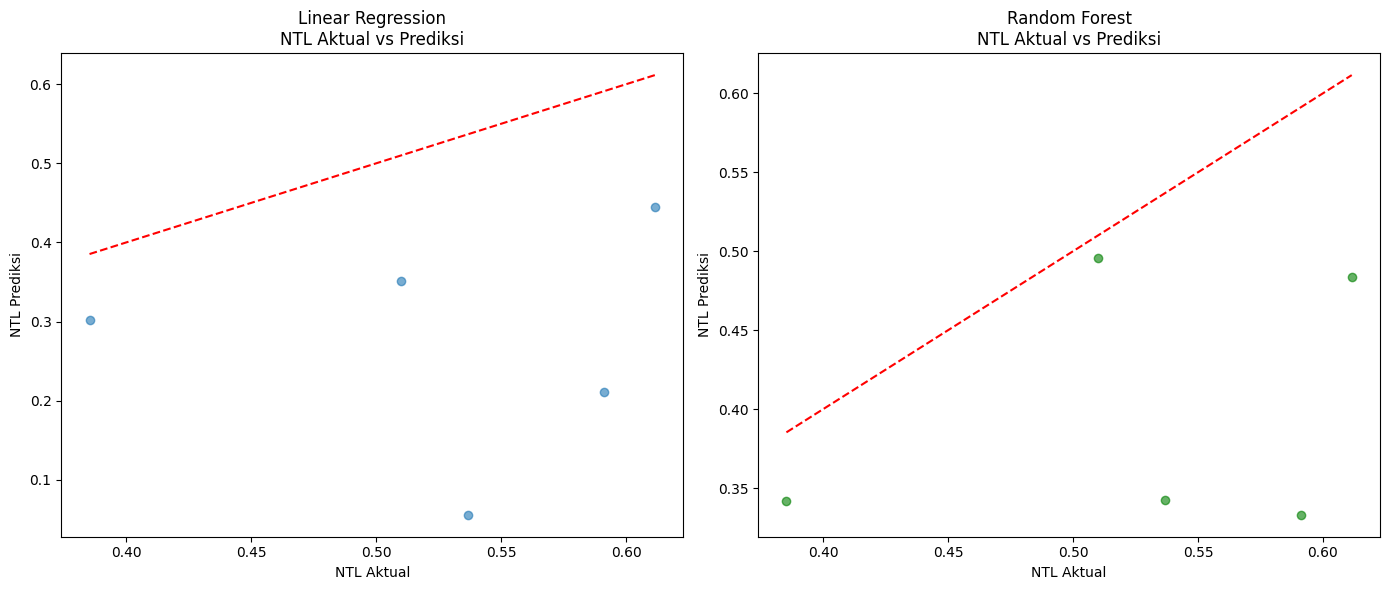

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Linear Regression\nNTL Aktual vs Prediksi")
plt.xlabel("NTL Aktual")
plt.ylabel("NTL Prediksi")

# Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_test, rf_pred, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Random Forest\nNTL Aktual vs Prediksi")
plt.xlabel("NTL Aktual")
plt.ylabel("NTL Prediksi")

plt.tight_layout()
plt.show()


In [35]:
# Simpan model Random Forest
joblib.dump(rf_model, 'model_random_forest_ntl.pkl')
print("Model Random Forest disimpan sebagai 'model_random_forest_ntl.pkl'")


Model Random Forest disimpan sebagai 'model_random_forest_ntl.pkl'


In [36]:
from sklearn.model_selection import GridSearchCV

# Definisikan parameter yang ingin diuji
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


In [37]:
# Inisialisasi model dasar
rf_base = RandomForestRegressor(random_state=42)

# Grid Search dengan 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# Fit ke data latih
grid_search.fit(X_train, y_train)

# Tampilkan hasil terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score (CV):", grid_search.best_score_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best R² Score (CV): -2.2416457541676826


In [38]:
# Ambil model terbaik
best_rf = grid_search.best_estimator_

# Prediksi
best_rf_pred = best_rf.predict(X_test)

# Evaluasi
print("Random Forest (Tuned) R² Score:", r2_score(y_test, best_rf_pred))
print("Random Forest (Tuned) MSE:", mean_squared_error(y_test, best_rf_pred))


Random Forest (Tuned) R² Score: -2.9513697263065017
Random Forest (Tuned) MSE: 0.02507387348649138


In [39]:
joblib.dump(best_rf, 'model_random_forest_ntl_tuned.pkl')
print("Model Random Forest terbaik disimpan sebagai 'model_random_forest_ntl_tuned.pkl'")


Model Random Forest terbaik disimpan sebagai 'model_random_forest_ntl_tuned.pkl'


In [40]:
!pip install plotly
import joblib
import plotly.graph_objs as go
from plotly.subplots import make_subplots


In [41]:
# Load semua model
model_lr = joblib.load('model_linear_regression_ntl.pkl')
model_rf = joblib.load('model_random_forest_ntl.pkl')
model_rf_tuned = joblib.load('model_random_forest_ntl_tuned.pkl')


In [42]:
# Prediksi
pred_lr = model_lr.predict(X_test)
pred_rf = model_rf.predict(X_test)
pred_rf_tuned = model_rf_tuned.predict(X_test)


In [43]:
fig = make_subplots(rows=1, cols=1,
                    subplot_titles=["Perbandingan Prediksi vs Aktual NTL"],
                    specs=[[{"type": "scatter"}]])

# Data aktual
fig.add_trace(go.Scatter(
    x=y_test,
    y=pred_lr,
    mode='markers',
    name='Linear Regression',
    marker=dict(color='blue')
))

fig.add_trace(go.Scatter(
    x=y_test,
    y=pred_rf,
    mode='markers',
    name='Random Forest',
    marker=dict(color='orange')
))

fig.add_trace(go.Scatter(
    x=y_test,
    y=pred_rf_tuned,
    mode='markers',
    name='Random Forest Tuned',
    marker=dict(color='green')
))

# Garis referensi (ideal prediction line)
fig.add_trace(go.Scatter(
    x=[y_test.min(), y_test.max()],
    y=[y_test.min(), y_test.max()],
    mode='lines',
    name='Perfect Prediction',
    line=dict(color='red', dash='dash')
))

fig.update_layout(
    title="Visualisasi Interaktif: Prediksi NTL oleh 3 Model",
    xaxis_title="NTL Aktual",
    yaxis_title="NTL Prediksi",
    width=800,
    height=600,
    legend=dict(x=0.01, y=0.99)
)

fig.show()


In [44]:
# Korelasi stringency index dan mobilitas
mobility_cols = ['workplaces_percent_change_from_baseline',
                'retail_and_recreation_percent_change_from_baseline',
                'transit_stations_percent_change_from_baseline']

for col in mobility_cols:
    corr = final_df[['stringency_index', col]].corr().iloc[0,1]
    print(f"Korelasi Stringency vs {col}: {corr:.3f}")


Korelasi Stringency vs workplaces_percent_change_from_baseline: -0.682
Korelasi Stringency vs retail_and_recreation_percent_change_from_baseline: -0.635
Korelasi Stringency vs transit_stations_percent_change_from_baseline: -0.706


In [45]:
corr_ntl = final_df[['stringency_index', 'mean_rad']].corr().iloc[0,1]
print(f"Korelasi Stringency vs NTL (mean_rad): {corr_ntl:.3f}")


Korelasi Stringency vs NTL (mean_rad): -0.065


In [46]:
# Buat kolom NTL lag 1 minggu (7 hari)
final_df['mean_rad_lag7'] = final_df['mean_rad'].shift(-7)

# Korelasi Stringency dengan NTL lag 7 hari
corr_lag = final_df[['stringency_index', 'mean_rad_lag7']].corr().iloc[0,1]
print(f"Korelasi Stringency vs NTL 7 hari berikutnya: {corr_lag:.3f}")


Korelasi Stringency vs NTL 7 hari berikutnya: -0.092


In [48]:
import pandas as pd

lockdown_start = pd.to_datetime('2020-03-15')
lockdown_end = pd.to_datetime('2020-06-30')

def phase(row):
    if row['date'] < lockdown_start:
        return 'pre-lockdown'
    elif lockdown_start <= row['date'] <= lockdown_end:
        return 'lockdown'
    else:
        return 'post-lockdown'

final_df['phase'] = final_df.apply(phase, axis=1)


In [49]:
final_df['week'] = final_df['date'].dt.to_period('W').apply(lambda r: r.start_time)
final_df['month'] = final_df['date'].dt.to_period('M').apply(lambda r: r.start_time)

# Rata-rata mingguan
weekly_mean = final_df.groupby(['phase', 'week'])[['mean_rad'] + mobility_cols].mean().reset_index()

# Rata-rata bulanan
monthly_mean = final_df.groupby(['phase', 'month'])[['mean_rad'] + mobility_cols].mean().reset_index()


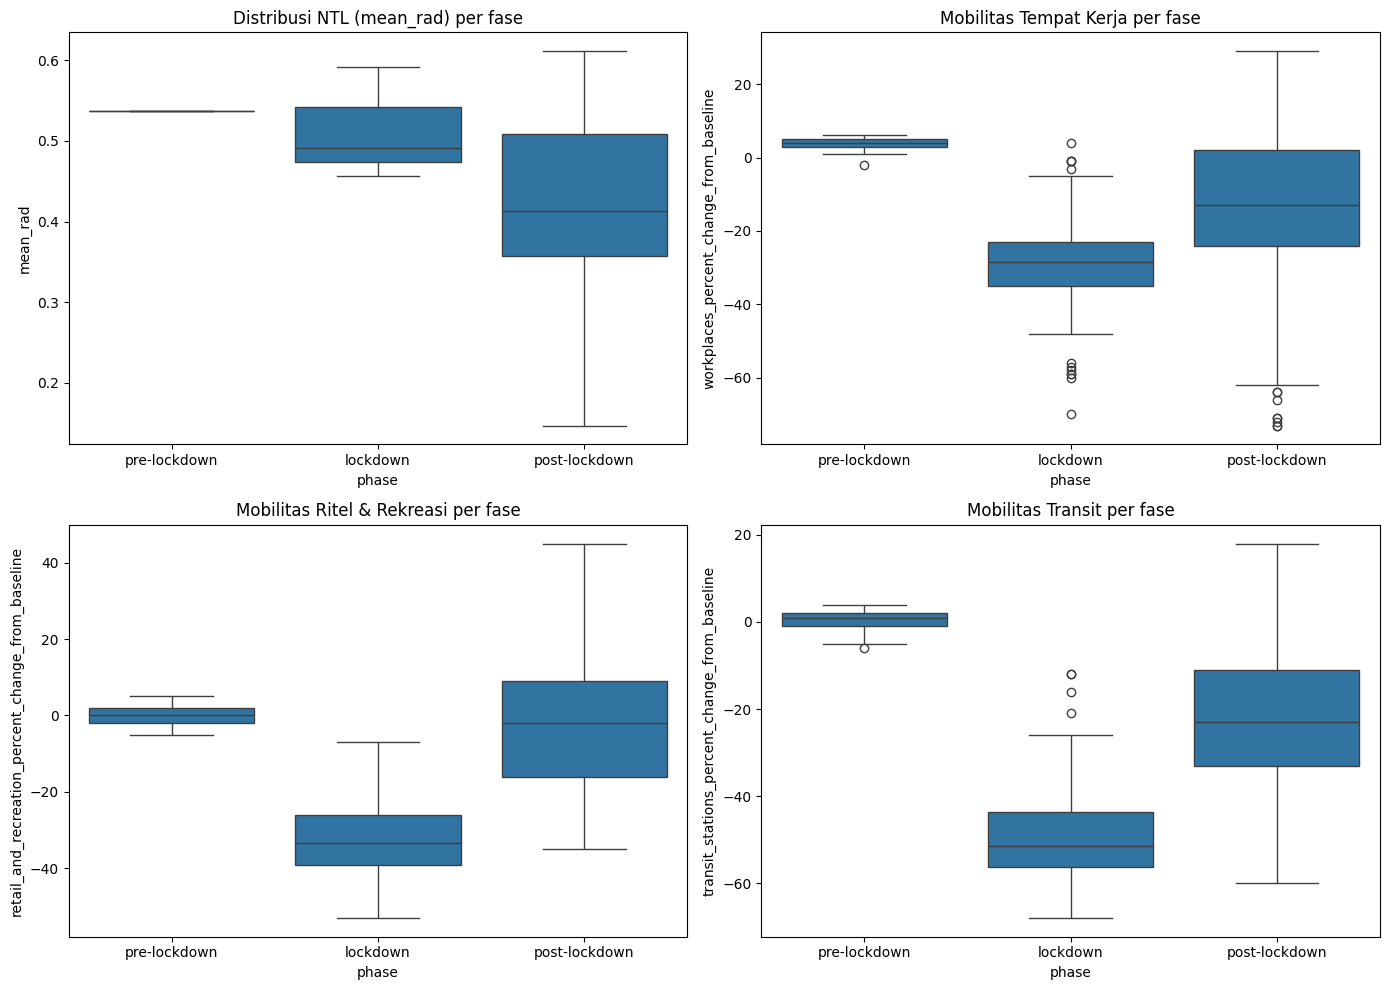

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(14,10))
sns.boxplot(data=final_df, x='phase', y='mean_rad', ax=axes[0,0])
axes[0,0].set_title('Distribusi NTL (mean_rad) per fase')

sns.boxplot(data=final_df, x='phase', y='workplaces_percent_change_from_baseline', ax=axes[0,1])
axes[0,1].set_title('Mobilitas Tempat Kerja per fase')

sns.boxplot(data=final_df, x='phase', y='retail_and_recreation_percent_change_from_baseline', ax=axes[1,0])
axes[1,0].set_title('Mobilitas Ritel & Rekreasi per fase')

sns.boxplot(data=final_df, x='phase', y='transit_stations_percent_change_from_baseline', ax=axes[1,1])
axes[1,1].set_title('Mobilitas Transit per fase')

plt.tight_layout()
plt.show()


In [51]:
from scipy.stats import ttest_ind, mannwhitneyu

def compare_phases(var):
    pre = final_df.loc[final_df['phase']=='pre-lockdown', var].dropna()
    lockdown = final_df.loc[final_df['phase']=='lockdown', var].dropna()
    post = final_df.loc[final_df['phase']=='post-lockdown', var].dropna()

    print(f"\nUji statistik untuk {var}:")

    # Pre vs Lockdown
    stat, p = mannwhitneyu(pre, lockdown)
    print(f"Pre-lockdown vs Lockdown: stat={stat:.3f}, p-value={p:.3f}")

    # Lockdown vs Post
    stat, p = mannwhitneyu(lockdown, post)
    print(f"Lockdown vs Post-lockdown: stat={stat:.3f}, p-value={p:.3f}")

variables = ['mean_rad'] + mobility_cols
for var in variables:
    compare_phases(var)



Uji statistik untuk mean_rad:
Pre-lockdown vs Lockdown: stat=2.000, p-value=1.000
Lockdown vs Post-lockdown: stat=39.000, p-value=0.262

Uji statistik untuk workplaces_percent_change_from_baseline:
Pre-lockdown vs Lockdown: stat=3116.000, p-value=0.000
Lockdown vs Post-lockdown: stat=19672.500, p-value=0.000

Uji statistik untuk retail_and_recreation_percent_change_from_baseline:
Pre-lockdown vs Lockdown: stat=3132.000, p-value=0.000
Lockdown vs Post-lockdown: stat=3253.500, p-value=0.000

Uji statistik untuk transit_stations_percent_change_from_baseline:
Pre-lockdown vs Lockdown: stat=3132.000, p-value=0.000
Lockdown vs Post-lockdown: stat=4531.000, p-value=0.000


In [52]:
import pandas as pd
import numpy as np

lockdown_start = pd.to_datetime('2020-03-15')

# Pastikan kolom date datetime
final_df['date'] = pd.to_datetime(final_df['date'])

# Hitung minggu relatif dari lockdown
final_df['week_from_lockdown'] = ((final_df['date'] - lockdown_start).dt.days // 7)


In [53]:
baseline_df = final_df[final_df['week_from_lockdown'] < 0]

baseline_ntl = baseline_df['mean_rad'].mean()
baseline_mobility = baseline_df[mobility_cols].mean()


In [54]:
final_df['ntl_dev'] = (final_df['mean_rad'] - baseline_ntl) / baseline_ntl * 100

for col in mobility_cols:
    final_df[f'{col}_dev'] = (final_df[col] - baseline_mobility[col]) / abs(baseline_mobility[col]) * 100


In [55]:
event_df = final_df.groupby('week_from_lockdown').agg({
    'ntl_dev': 'mean',
})

for col in mobility_cols:
    event_df[f'{col}_dev'] = final_df.groupby('week_from_lockdown')[f'{col}_dev'].mean()

event_df = event_df.reset_index()


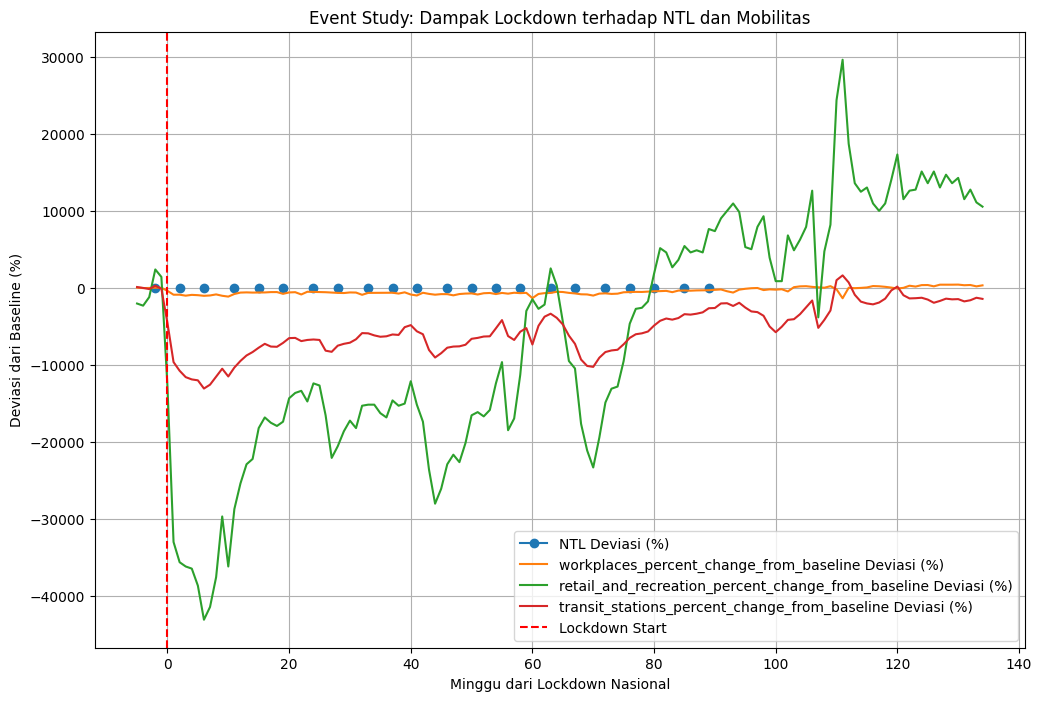

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

plt.plot(event_df['week_from_lockdown'], event_df['ntl_dev'], label='NTL Deviasi (%)', marker='o')
for col in mobility_cols:
    plt.plot(event_df['week_from_lockdown'], event_df[f'{col}_dev'], label=f'{col} Deviasi (%)')

plt.axvline(x=0, color='red', linestyle='--', label='Lockdown Start')
plt.xlabel('Minggu dari Lockdown Nasional')
plt.ylabel('Deviasi dari Baseline (%)')
plt.title('Event Study: Dampak Lockdown terhadap NTL dan Mobilitas')
plt.legend()
plt.grid(True)
plt.show()
